In [36]:
import pandas as pd
import random
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import model_selection, cluster
from sklearn.metrics import confusion_matrix, rand_score, adjusted_rand_score

df = pd.read_csv("selection_clean.csv", sep=';')
df_selected_features = df[['URLLength', 
                          #'DomainLength', 
                          'IsDomainIP',
                          #'URLSimilarityIndex', 
                          #'CharContinuationRate', 
                          #'TLDLegitimateProb',
                          #'URLCharProb', 
                          #'TLDLength', 
                          'NoOfSubDomain', 
                          #'HasObfuscation',
                          'NoOfObfuscatedChar', 
                          #'ObfuscationRatio', 
                          #'NoOfLettersInURL',
                          #'LetterRatioInURL', 
                          #'NoOfDegitsInURL', 
                          #'DegitRatioInURL',
                          #'NoOfEqualsInURL', 
                          #'NoOfQMarkInURL', 
                          #'NoOfAmpersandInURL',
                          #'NoOfOtherSpecialCharsInURL', 
                          #'SpacialCharRatioInURL', 
                          'IsHTTPS',
                          #'LineOfCode', 
                          #'LargestLineLength', 
                          'HasTitle', 
                          #'DomainTitleMatchScore',
                          #'URLTitleMatchScore', 
                          'HasFavicon', 
                          #'Robots', 
                          'IsResponsive',
                          #'NoOfURLRedirect', 
                          #'NoOfSelfRedirect', 
                          'HasDescription', 
                          'NoOfPopup',
                          'NoOfiFrame', 
                          #'HasExternalFormSubmit', 
                          'HasSocialNet',
                          #'HasSubmitButton', 
                          #'HasHiddenFields', 
                          #'HasPasswordField', 
                          #'Bank', 
                          #'Pay',
                          #'Crypto', 
                          'HasCopyrightInfo', 
                          #'NoOfImage', 
                          #'NoOfCSS', 
                          #'NoOfJS',
                          #'NoOfSelfRef', 
                          #'NoOfEmptyRef', 
                          #'NoOfExternalRef', 
                          'label'
                          ]]

df_selected_features = df_selected_features.dropna()
df_selected_features = (df_selected_features-df_selected_features.min())/(df_selected_features.max()-df_selected_features.min())

sample = df_selected_features.head(300)
sample.to_csv("sample300.csv", sep=',', index=False, encoding='utf-8')

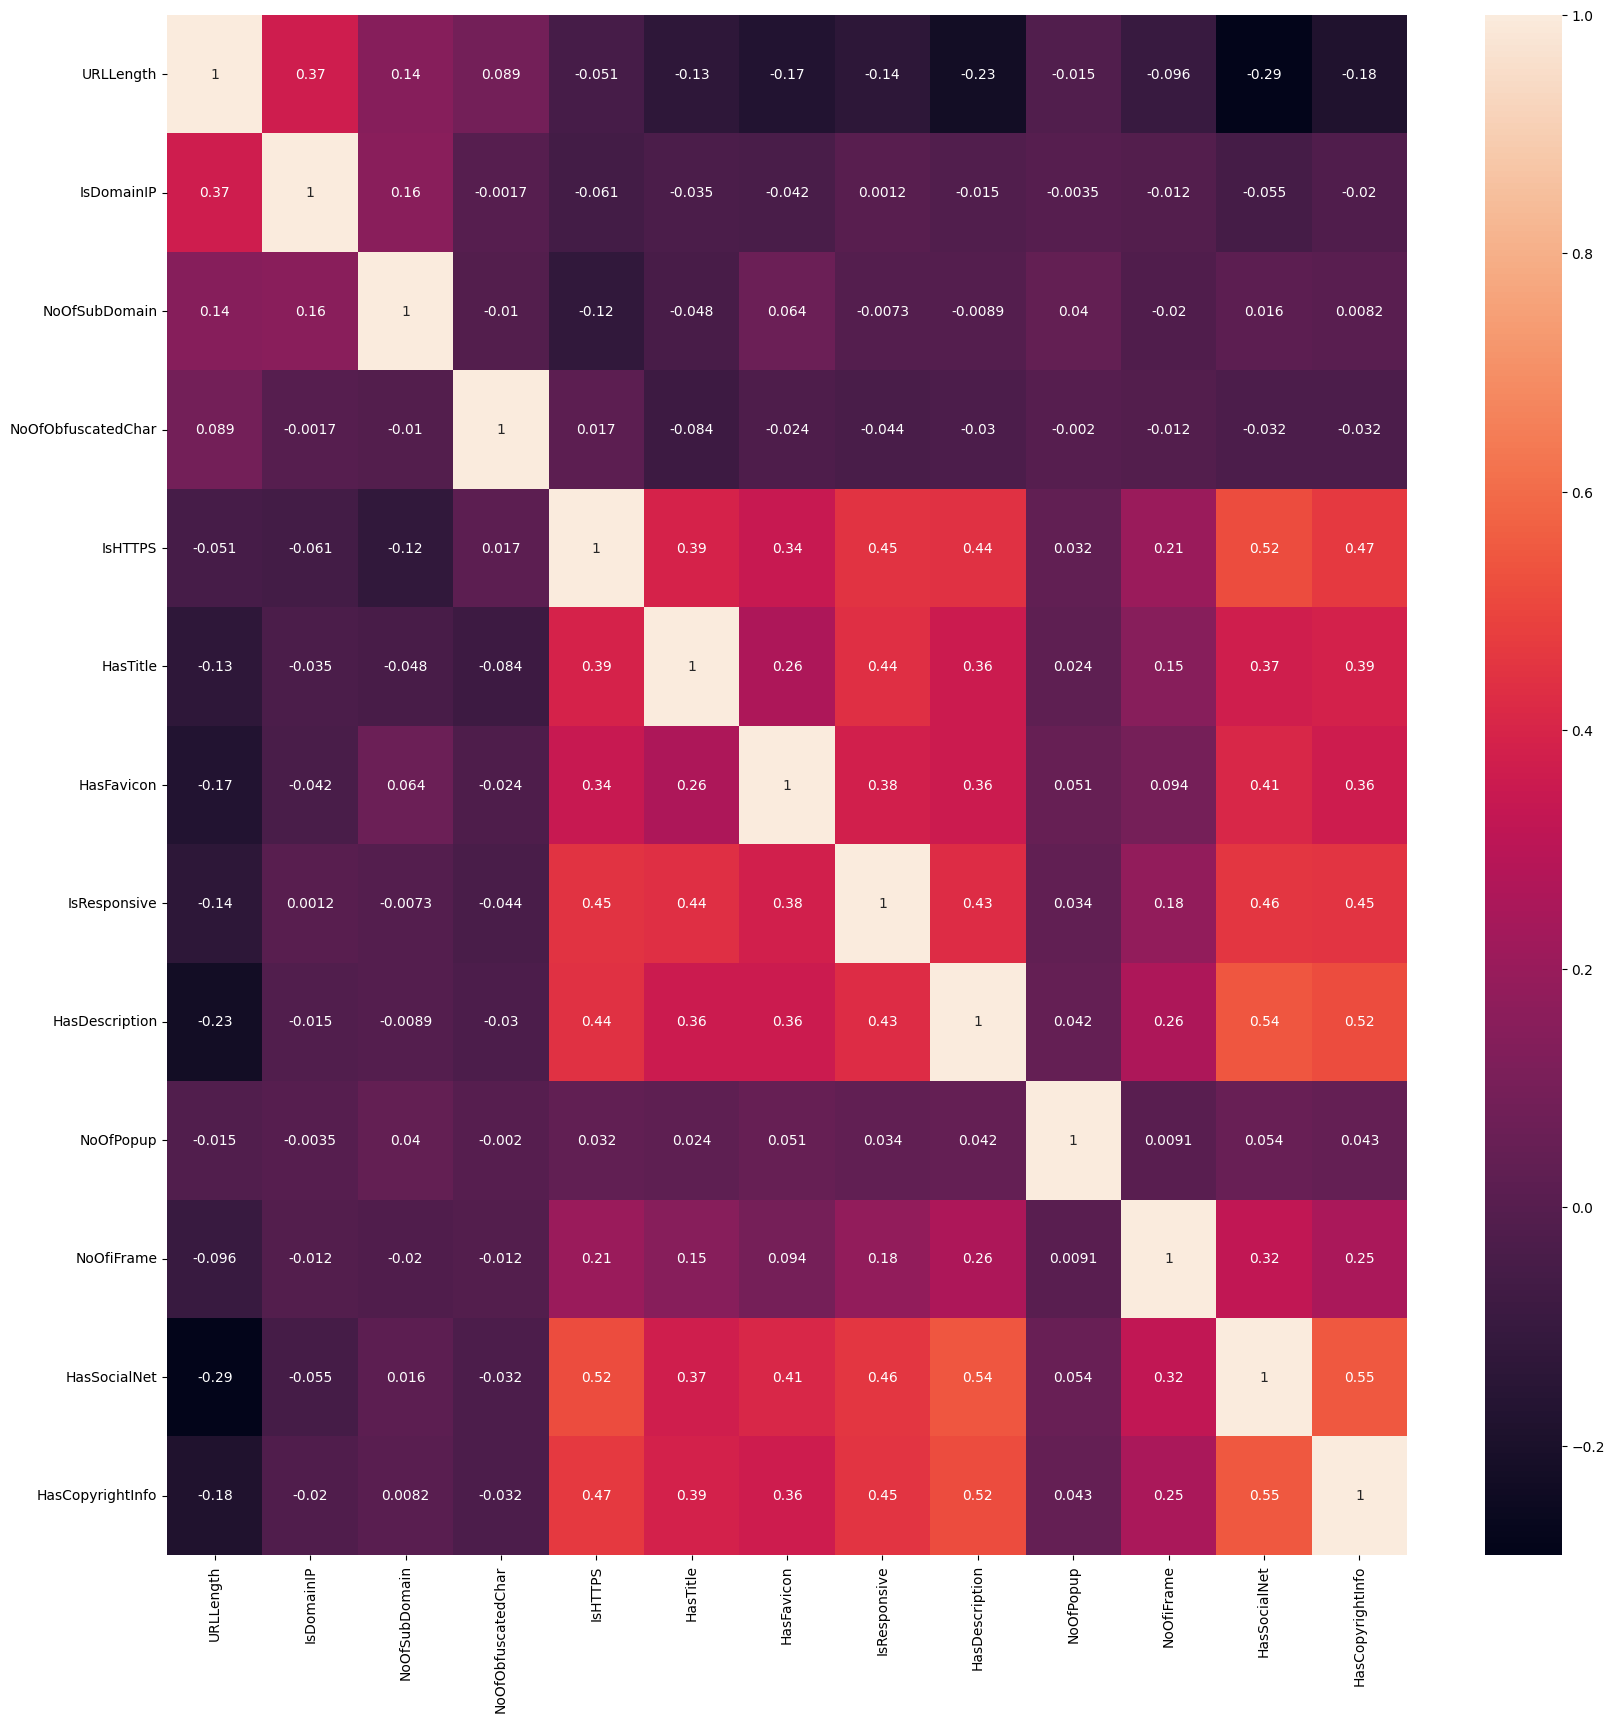

In [6]:
f, ax = plt.subplots(figsize=(20, 20))
sn.heatmap(df_selected_features.corr(), annot=True)

plt.savefig('heat.png', dpi=150)

In [2]:
# Функция, определяющая меру близости между двумя объектами (типа Series).
def get_distance(obj1, obj2):
    obj1_c = obj1.drop("label")
    obj2_c = obj2.drop("label")
    distance = sum((obj1_c - obj2_c)**2)**0.5
    return distance

# Класс, определяющий ребро графа.
class Connection:
    def __init__(self, first_index, second_index, first_point, second_point):
        self.first_index = first_index
        self.second_index = second_index
        self.first_point = first_point
        self.second_point = second_point

    def __str__(self):
        return f"{self.first_index} to {self.second_index}"

In [76]:
# Находим две ближайшие точки.

# Индекс первой точки в dataframe.
min_index_i = 0
# Индекс второй точки в dataframe.
min_index_j = 0
# Минимальное мера близости.
min_distance = 10000

# Во вложенном цикле (каждый объект с каждым) находим пару с минимальной мерой близости.
for index_i, row_i in sample.iterrows():
    for index_j, row_j in sample.iterrows():
        # Если это один и тот же объект - пропускаем итерацию.
        if (index_i <= index_j):
            continue
        
        distance = get_distance(row_i, row_j)
        
        if (distance < min_distance):
            min_index_i = index_i
            min_index_j = index_j
            min_distance = distance

    print(index_i)

print(min_distance)
print(min_index_i)
print(min_index_j)

print("\n")

# Создаем перове ребро графа - между ближайшими точками.
c = Connection(min_index_i, min_index_j, sample.iloc[min_index_i], sample.iloc[min_index_j])
# Набор точек, которые уже вопшли в граф.
checked_points = set()
checked_points.add(min_index_i)
checked_points.add(min_index_j)

not_checked_points = []
for index_i, row_i in sample.iterrows():
    if (index_i in checked_points):
        continue
    
    not_checked_points.append(index_i)

# Список ребер графа.
connections = [c]

# Пока все точки не войдут в граф - продолжаем цикл.
while len(checked_points) != sample.shape[0]:
    min_index = 0
    min_checked_index = 0
    min_distance = 10000

    min_checked_index_obj = 0
    min_index_obj = 0

    # Находим ближайшую точку к точкам, уже находящимся в графе.
    for checked_point_index in checked_points:
        checked_point = sample.iloc[checked_point_index]
        
        for index_i in not_checked_points:
            row_i = sample.iloc[index_i]
            
            distance = get_distance(checked_point, row_i)

            if (distance < min_distance):
                min_index = index_i
                min_distance = distance
                min_checked_index = checked_point_index
                
                min_checked_index_obj = checked_point
                min_index_obj = row_i
    
    checked_points.add(min_index)
    not_checked_points.remove(min_index)
    connections.append(Connection(min_checked_index, min_index, min_checked_index_obj, min_index_obj))

    print(len(checked_points))

for i in connections:
    print(i)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [6]:
file1 = open('conn_no_usi.txt', 'r')
Lines = file1.readlines()

connections = []

count = 0
# Strips the newline character
for line in Lines:
    count += 1
    str_split = line.strip().split(' to ')
    print(str_split)

    index_0 = int(str_split[0])
    index_1 = int(str_split[1])

    obj_0 = sample.iloc[index_0]
    obj_1 = sample.iloc[index_1]
    
    connections.append(Connection(index_0, index_1, obj_0, obj_1))

['24', '17']
['24', '180']
['180', '260']
['24', '297']
['297', '55']
['55', '27']
['27', '196']
['260', '275']
['275', '11']
['11', '148']
['196', '218']
['218', '120']
['120', '264']
['264', '172']
['196', '225']
['225', '286']
['225', '4']
['225', '199']
['4', '93']
['199', '182']
['297', '183']
['183', '59']
['260', '154']
['154', '57']
['154', '115']
['115', '237']
['237', '129']
['129', '256']
['57', '153']
['153', '235']
['153', '92']
['256', '171']
['92', '178']
['178', '241']
['241', '268']
['268', '47']
['178', '131']
['131', '118']
['47', '97']
['47', '174']
['260', '215']
['215', '192']
['154', '53']
['53', '240']
['53', '252']
['252', '119']
['252', '152']
['275', '123']
['172', '234']
['234', '98']
['98', '193']
['193', '228']
['193', '281']
['281', '273']
['234', '155']
['234', '58']
['155', '284']
['284', '195']
['284', '139']
['284', '5']
['5', '261']
['261', '86']
['86', '159']
['159', '103']
['103', '173']
['173', '165']
['5', '41']
['41', '32']
['173', '138']
['195'

In [24]:
import networkx as nx
from networkx.drawing.nx_agraph import graphviz_layout
from networkx.algorithms.components import connected_components
from pylab import rcParams

G = nx.Graph()
for conn in connections:
    dist = get_distance(conn.first_point, conn.second_point)

    G.add_node(conn.first_index)
    G.add_node(conn.second_index)

    nx.add_path(G, [conn.first_index, conn.second_index], weight=round(dist, 4))

n = 100
rcParams['figure.figsize'] = n, n
pos = graphviz_layout(G, prog='neato')

colors = []
for node in G:
    series = sample.iloc[node]
    if (series['label'] == 1):
        colors.append("yellow")
    else:
        colors.append("lightgreen")

sub_graphs = nx.connected_components(G)

for g in sub_graphs:
    print(g)

edges, weights = zip(*nx.get_edge_attributes(G,'weight').items())

labels = nx.get_edge_attributes(G,'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
nx.draw(G, pos=pos,
        node_color=colors, 
        node_size=1000,
        with_labels=True, 
        arrows=False,
        #edge_color = weights,
        edge_cmap=plt.cm.Blues)

plt.savefig('3_clusters_classes.png', dpi=150)

{256, 129, 131, 260, 4, 264, 11, 268, 17, 275, 148, 24, 153, 154, 27, 152, 286, 297, 171, 172, 174, 47, 178, 180, 53, 182, 55, 183, 57, 59, 192, 196, 199, 215, 218, 92, 93, 225, 97, 235, 237, 240, 241, 115, 118, 119, 120, 252}
{123}
{193, 98, 228, 234, 273, 281, 58, 155}
{5, 261, 134, 138, 139, 266, 141, 142, 145, 149, 284, 159, 32, 290, 165, 41, 173, 52, 195, 74, 204, 205, 206, 211, 86, 221, 223, 224, 96, 103, 112, 255}
{176, 78}
{0, 1, 2, 3, 6, 7, 9, 13, 14, 15, 16, 19, 20, 21, 23, 25, 26, 28, 30, 31, 33, 34, 36, 37, 38, 39, 40, 43, 46, 48, 49, 50, 51, 56, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 75, 76, 77, 79, 80, 81, 82, 83, 84, 85, 87, 88, 89, 90, 91, 94, 95, 99, 100, 101, 102, 104, 105, 106, 107, 108, 109, 110, 111, 113, 114, 116, 117, 122, 124, 125, 126, 127, 130, 132, 133, 135, 136, 137, 140, 143, 144, 146, 147, 150, 151, 156, 157, 158, 161, 162, 163, 164, 167, 168, 169, 170, 175, 177, 179, 185, 186, 187, 188, 189, 190, 191, 194, 197, 198, 201, 202, 203, 208, 20

In [62]:
x = []
y = []

for i in range(0, 150, 1):
    G1 = nx.Graph()
    for conn in connections:
        dist = get_distance(conn.first_point, conn.second_point)
        
        if (dist > i / 100):
            continue
    
        nx.add_path(G1, [conn.first_index, conn.second_index], weight=round(dist, 4))

    clusters_num = sum(1 for x in nx.connected_components(G1))
    
    print(f"{i / 100}: {clusters_num}")
    x.append(i / 100)
    y.append(clusters_num)

0.0: 26
0.01: 28
0.02: 45
0.03: 53
0.04: 53
0.05: 54
0.06: 58
0.07: 59
0.08: 57
0.09: 58
0.1: 60
0.11: 61
0.12: 63
0.13: 64
0.14: 64
0.15: 65
0.16: 68
0.17: 65
0.18: 68
0.19: 68
0.2: 67
0.21: 69
0.22: 69
0.23: 69
0.24: 68
0.25: 66
0.26: 57
0.27: 53
0.28: 51
0.29: 49
0.3: 47
0.31: 46
0.32: 45
0.33: 45
0.34: 44
0.35: 44
0.36: 44
0.37: 43
0.38: 42
0.39: 41
0.4: 41
0.41: 41
0.42: 41
0.43: 41
0.44: 41
0.45: 41
0.46: 41
0.47: 42
0.48: 42
0.49: 42
0.5: 42
0.51: 41
0.52: 41
0.53: 41
0.54: 40
0.55: 40
0.56: 40
0.57: 40
0.58: 39
0.59: 39
0.6: 39
0.61: 39
0.62: 39
0.63: 39
0.64: 39
0.65: 39
0.66: 39
0.67: 39
0.68: 39
0.69: 39
0.7: 39
0.71: 39
0.72: 39
0.73: 39
0.74: 39
0.75: 39
0.76: 39
0.77: 39
0.78: 39
0.79: 39
0.8: 39
0.81: 39
0.82: 39
0.83: 39
0.84: 39
0.85: 38
0.86: 38
0.87: 38
0.88: 38
0.89: 38
0.9: 38
0.91: 38
0.92: 38
0.93: 38
0.94: 38
0.95: 38
0.96: 38
0.97: 38
0.98: 38
0.99: 38
1.0: 20
1.01: 6
1.02: 6
1.03: 4
1.04: 4
1.05: 3
1.06: 2
1.07: 2
1.08: 1
1.09: 1
1.1: 1
1.11: 1
1.12: 1
1.13: 1

AttributeError: module 'seaborn' has no attribute 'plot'

77 to 30 dist 0.0
3 to 403 dist 0.0
3 to 492 dist 0.0
137 to 289 dist 0.0
137 to 336 dist 0.0
137 to 337 dist 0.0
231 to 300 dist 0.0
300 to 434 dist 0.0
209 to 356 dist 0.0
242 to 243 dist 0.0
108 to 246 dist 0.0
299 to 476 dist 0.0
80 to 87 dist 0.0
80 to 402 dist 0.0
276 to 308 dist 0.0
135 to 479 dist 0.0
1 to 248 dist 0.0
1 to 442 dist 0.0
287 to 293 dist 0.0
14 to 109 dist 0.0
14 to 186 dist 0.0
124 to 133 dist 0.0
124 to 203 dist 0.0
124 to 210 dist 0.0
124 to 263 dist 0.0
124 to 296 dist 0.0
124 to 338 dist 0.0
26 to 328 dist 0.0
70 to 329 dist 0.0
369 to 373 dist 0.0
84 to 429 dist 0.0
83 to 85 dist 0.0
83 to 226 dist 0.0
83 to 374 dist 0.0
294 to 456 dist 0.0
49 to 101 dist 0.0
49 to 161 dist 0.0
127 to 343 dist 0.0
40 to 230 dist 0.0
207 to 465 dist 0.0
206 to 458 dist 0.0
241 to 268 dist 0.0012374657963211688
420 to 421 dist 0.003041481366817922
11 to 148 dist 0.012522877274637967
480 to 15 dist 0.01315789473684209
292 to 307 dist 0.01315789473684209
150 to 272 dist 0.01315

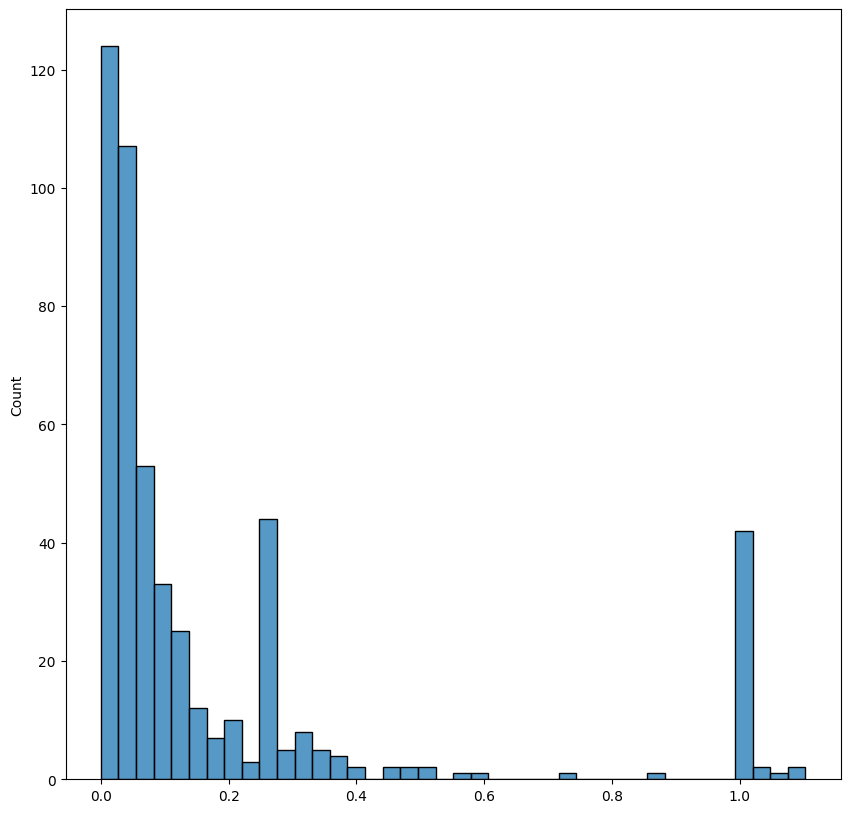

In [29]:
s = sorted(connections, key=lambda x: get_distance(x.first_point, x.second_point))
distances = []

for c in s:
    dist = get_distance(c.first_point, c.second_point)

    print(f"{c} dist {dist}")
    
    distances.append(dist)
    
    #print(c)

rcParams['figure.figsize'] = 10, 10
sn.histplot(distances, bins=40)

plt.savefig('hist_noUSI.png', dpi=150)

In [27]:
from sklearn.metrics import rand_score 

sub_graphs = nx.connected_components(G)
list_graphs = []

for g in sub_graphs:
    list_graphs.append(g)
    
print(len(list_graphs))

labels_predicted = []
labels_true = []

for i in range(0, 300):
    cluster_index = 0
    for g in list_graphs:
        if (i in g):
            print(f"{i} in {cluster_index}")
            labels_predicted.append(cluster_index)
            labels_true.append(round(sample.iloc[i]['label']))
            break
        else:
            cluster_index += 1

print(labels_predicted)
print(labels_true)

rand_score(labels_true, labels_predicted)

22
0 in 5
1 in 5
2 in 5
3 in 5
4 in 0
5 in 3
6 in 5
7 in 5
8 in 6
9 in 5
10 in 14
11 in 0
12 in 10
13 in 5
14 in 5
15 in 5
16 in 5
17 in 0
18 in 9
19 in 5
20 in 5
21 in 5
22 in 9
23 in 5
24 in 0
25 in 5
26 in 5
27 in 0
28 in 5
29 in 16
30 in 5
31 in 5
32 in 3
33 in 5
34 in 5
35 in 18
36 in 5
37 in 5
38 in 5
39 in 5
40 in 5
41 in 3
42 in 6
43 in 5
44 in 20
45 in 11
46 in 5
47 in 0
48 in 5
49 in 5
50 in 5
51 in 5
52 in 3
53 in 0
54 in 13
55 in 0
56 in 5
57 in 0
58 in 2
59 in 0
60 in 5
61 in 5
62 in 5
63 in 5
64 in 5
65 in 5
66 in 5
67 in 5
68 in 5
69 in 5
70 in 5
71 in 5
72 in 5
73 in 5
74 in 3
75 in 5
76 in 5
77 in 5
78 in 4
79 in 5
80 in 5
81 in 5
82 in 5
83 in 5
84 in 5
85 in 5
86 in 3
87 in 5
88 in 5
89 in 5
90 in 5
91 in 5
92 in 0
93 in 0
94 in 5
95 in 5
96 in 3
97 in 0
98 in 2
99 in 5
100 in 5
101 in 5
102 in 5
103 in 3
104 in 5
105 in 5
106 in 5
107 in 5
108 in 5
109 in 5
110 in 5
111 in 5
112 in 3
113 in 5
114 in 5
115 in 0
116 in 5
117 in 5
118 in 0
119 in 0
120 in 0
121 in 6
12

0.8445484949832776

In [60]:
sample

,URLLength,IsDomainIP,NoOfSubDomain,IsHTTPS,HasTitle,HasFavicon,IsResponsive,HasDescription,NoOfPopup,NoOfiFrame,HasSocialNet,HasCopyrightInfo,label
0,0.026316,0.0,0.25,1.0,1.0,1.0,1.0,1.0,0.0,0.000000,1.0,0.0,1.0
1,0.105263,0.0,0.50,1.0,1.0,1.0,1.0,1.0,0.0,0.000000,1.0,1.0,1.0
2,0.078947,0.0,0.25,1.0,1.0,1.0,1.0,1.0,0.0,0.115385,1.0,0.0,1.0
3,0.078947,0.0,0.25,1.0,1.0,1.0,1.0,1.0,0.0,0.038462,1.0,1.0,1.0
4,0.144737,0.0,0.50,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,0.368421,0.0,0.25,1.0,1.0,1.0,1.0,0.0,0.0,0.076923,1.0,1.0,1.0
296,0.118421,0.0,0.25,1.0,1.0,0.0,1.0,1.0,0.0,0.000000,1.0,1.0,1.0
297,0.118421,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
298,0.157895,0.0,0.25,1.0,1.0,0.0,1.0,1.0,0.0,0.000000,1.0,1.0,1.0


In [32]:
len(labels_true)

300

Recall and precision

In [30]:
class_label = 1
class_label_pred = 5

class_pred_instances = 0
class_instances_pred_correct = 0
class_instances = 0

print(len(labels_true))

for i in range(0, 300):
    true_label = labels_true[i]
    
    if (true_label == class_label):
        class_instances += 1
    
    # Предсказали класс
    if (labels_predicted[i] == class_label_pred):
        class_pred_instances += 1

        # Правильно предсказали класс
        if (true_label == class_label):
            class_instances_pred_correct += 1

precision = class_instances_pred_correct / class_pred_instances
recall = class_instances_pred_correct / class_instances

print(f"Predicted instances: {class_pred_instances}; Predicted correctly: {class_instances_pred_correct}; Precision {precision}")
print(f"Instances: {class_instances}; Predicted correctly: {class_instances_pred_correct}; Recall {recall}")

300
Predicted instances: 183; Predicted correctly: 181; Precision 0.9890710382513661
Instances: 197; Predicted correctly: 181; Recall 0.9187817258883249


In [45]:
sample.to_excel("sample300.xlsx", index=False)

In [39]:
data = []

for i in range(0, 300):
    obj_i = sample.iloc[i]
    row = []
    for j in range(0, 300):
        obj_j = sample.iloc[j]
        dist = get_distance(obj_i, obj_j)
        row.append(dist)
    
    data.append(row)

df2 = pd.DataFrame(data)
df2.to_csv("obj-obj.csv", sep=',', index=False, encoding='utf-8')

In [44]:
df2.to_excel("obj-obj.xlsx", index=False)